<a href="https://colab.research.google.com/github/componavt/differential_equations/blob/main/src/hill_equation/deepxde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.2 MB/s eta 0:00:00
No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.087639 s

'compile' took 0.411841 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.21e-01, 2.50e-01]    [1.18e-01, 2.50e-01]    []  
1000      [5.30e-06, 1.90e-10]    [4.46e-06, 1.90e-10]    []  
2000      [2.65e-06, 4.46e-11]    [2.21e-06, 4.46e-11]    []  
3000      [1.20e-06, 1.32e-11]    [9.73e-07, 1.32e-11]    []  
4000      [6.01e-07, 4.11e-12]    [4.92e-07, 4.11e-12]    []  
5000      [3.44e-07, 2.13e-12]    [2.89e-07, 2.13e-12]    []  

Best model at step 5000:
  train loss: 3.44e-07
  test loss: 2.89e-07
  test metric: []

'train' took 7.498158 s



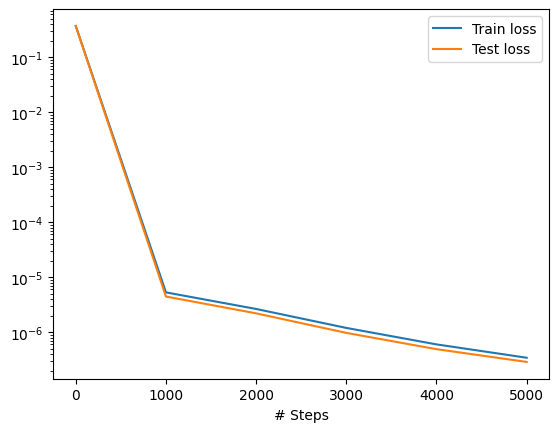

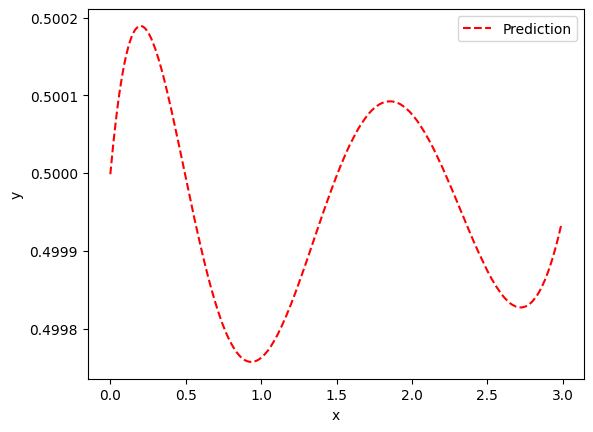

In [1]:
!pip install deepxde
import deepxde as dde
import numpy as np
import tensorflow as tf

# Параметры
alpha = 0.01  # Близко к нулю, но не ноль (сингулярность)
b = 1.0       # Пример значения b > 0

# Определение уравнения
def hill_equation(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=0)  # dy/dt
    x_alpha = tf.pow(y, 1/alpha)              # x^(1/alpha)
    b_alpha = tf.pow(b, 1/alpha)               # b^(1/alpha)
    return dy_t - x_alpha / (b_alpha + x_alpha)

# Геометрия (временной интервал)
geom = dde.geometry.TimeDomain(0, 3)

# Начальное условие (x(0) = x0, например, x0 = 0.5)
ic = dde.icbc.IC(geom, lambda x: 0.5, lambda _, on_initial: on_initial)

# Данные для обучения
data = dde.data.PDE(
    geom,
    hill_equation,
    ic,
    num_domain=100,
    num_boundary=2,
    num_test=300
)

# Архитектура нейросети
model = dde.Model(data, dde.nn.FNN([1] + [32] * 4 + [1], "tanh", "Glorot normal"))

# Компиляция и обучение
model.compile("adam", lr=0.001)
model.train(iterations=5000, display_every=1000)

# Визуализация
dde.saveplot(model.losshistory, model.train_state, issave=False, isplot=True)